In [1]:
name = '2015-08-06-table-to-barplot'
title = "Just a simple bar plot"
tags = 'python, dataviz, meteorology, polar lows'

In [2]:
from nb_tools import connect_notebook_to_post
from IPython.core.display import HTML

html = connect_notebook_to_post(name, title, tags)

Couple of days ago I stumbled upon a table in one literature review ;-) and asked myself: "How can these data be presented better?". So I sat and wrote a little Python code that produces a neat bar chart using powers of `matplotlib` and to some extent `pandas`. Think of this post as a cookbook page with a recipy assembled from a handful of Stack Overflow answers and `matplotlib` documentation.

<!-- PELICAN_END_SUMMARY -->

Here is the original table, though written in Markdown, not in LaTeX.

The data consists of estimates of ozone burden in Tg and its production in Tg per year with the corresponding references. The idea was to present the data on a single figure, hence I decided to plot a series of bar pairs. In other words, each study will correspond to a pair of bars, one plotted along one axis and the other - along another axis.

|Burden, Tg | Production, Tg yr–1 | Reference |
|:---------:|:-------------------:|:---------:|
| Modelling Studies                            |
|37+-23     |4877+-853            |Young et al. (2013) |
|323        |-	                  |Archibald et al. (2011)  |
|330        |4876                 |Kawase et al. (2011)  |
|312        |4289                 |Huijnen et al. (2010)  |
|334        |3826                 |Zeng et al. (2010)  |
|324        |4870                 |Wild and Palmer (2008)  |
|314        |-	                  |Zeng et al. (2008)  |
|319        |4487                 |Wu et al. (2007) |
|372        |5042                 |Horowitz (2006)  |
|349        |4384                 |Liao et al. (2006) |
|344+-39    |5110+-606            |Stevenson et al. (2006) |
|314+-33    |4465+-514            |Wild (2007) |
|Observational Studies |
|333        | -	                  |Fortuin and Kelder (1998) |
|327        | -	                  |Logan (1999) |
|325        | -	                  |Ziemke et al. (2011) |
|319–351    | -	                  |Osterman et al. (2008) |

It can be seen that the table is not very expressive in presenting data. Let's try to convert it to a diagram that hopefully will be more eloquent.

### Load some magic and necessary modules

In [3]:
%matplotlib inline

In [4]:
import matplotlib
import matplotlib.colors as mcol
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
matplotlib.style.use('ggplot') # make the plot style prettier
matplotlib.rcParams['mathtext.default'] = 'regular' # make LaTeX expressions not italised
matplotlib.rcParams['font.family'] = 'Arial'

### Input data

Before actually loading the data they needed to be cleaned up a bit. The simplest way was to make .csv file out of the original LaTeX table.
The next line is an example line of the file. Note that the last element denotes whether the study is from modelling ('mod') or observation ('obs') group.

319,NaN,4487,NaN,Wu et al.,2007,mod

OK, now the data can be read by pretty much any method. I for obvious reasons chose `pandas`, which function loaded the data into a dataframe. Using `sort()` function, I sorted the entries by the year of publication.

In [6]:
df = pd.read_csv('../data/o3_budget_studies.csv').sort(['Year'])

In [7]:
df

,Burden,Burden_error,Production,Production_error,Authors,Year,Type
12,333,NaN,NaN,NaN,Fortuin and Kelder,1998,obs
13,327,NaN,NaN,NaN,Logan,1999,obs
8,372,NaN,5042,NaN,Horowitz,2006,mod
9,349,NaN,4384,NaN,Liao et al.,2006,mod
10,344,39,5110,606,Stevenson et al.,2006,mod
7,319,NaN,4487,NaN,Wu et al.,2007,mod
11,314,33,4465,514,Wild,2007,mod
5,324,NaN,4870,NaN,Wild and Palmer,2008,mod
6,314,NaN,NaN,NaN,Zeng et al.,2008,mod
15,335,16,NaN,NaN,Osterman et al.,2008,obs


### Visualisation

Before getting down to the actual figure, I needed to define pairs of variables to use later in `bar` function. Blueish and reddish colors mark modelling and observational studies, while lighter/darker shades of each color correspond to burden/production columns.

In [8]:
# Convert hex colors to RGB colors used by matplotlib
clr1 = [mcol.hex2color(i) for i in ['#348ABD', '#FF9933']]
clr2 = [mcol.hex2color(i) for i in ['#15374C', '#B26B24']]
width = 0.35 # width of the bars
# Keywords for error bars
error_kw1 = dict(ecolor='#5F5F5F', lw=2, capsize=5, capthick=2) 
error_kw2 = dict(ecolor='#FAFAFA', lw=2, capsize=5, capthick=2)

Variables like `foo1` and `foo2` essentially correspond to different axis.

In [9]:
inds = np.arange(len(df)) # length of the dataframe

In [10]:
# Blueish colors for modelling, otherwise - orange
barcolors1 = [clr1[0] if df['Type'].str.match('mod').values[i] else clr1[1] for i in inds]
barcolors2 = [clr2[0] if df['Type'].str.match('mod').values[i] else clr2[1] for i in inds]

Next, I created a list with Author-Year labels for each pair of bars.

In [11]:
ylabs = [i+' ({})'.format(j) for i,j in zip(df['Authors'],df['Year'])]

Now, let's visualise the data using `matplotlib`'s horizontal bar plot

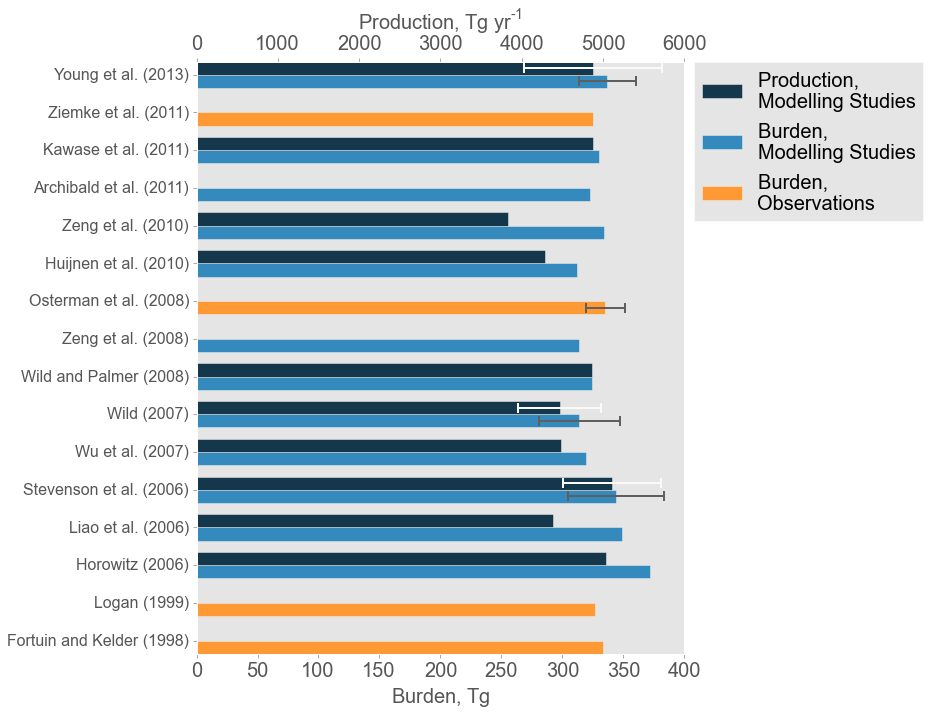

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

brdn = ax.barh(inds, df['Burden'], width, color=barcolors1, 
              xerr=df['Burden_error'], error_kw=error_kw1)
ax.grid('off')
ax.set_xlabel('Burden, $Tg$', fontsize=20)
ax.set_yticks(inds+width)
ax.set_yticklabels(ylabs,fontsize=16)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right='off',      # ticks along the bottom edge are off
    left='on'          # ticks along the top edge are off
    ) # labels along the bottom edge are off

ax2 = ax.twiny() # Duplicate the Y axis and create new X axis for "Production" column
prod = ax2.barh(inds+width, df['Production'], width, color=barcolors2, 
               xerr=df['Production_error'], error_kw=error_kw2)
ax2.grid('off')
_ = ax2.set_xlabel('Production, $Tg$ $yr^{-1}$', fontsize=20)
ax2.tick_params(axis='x', which='major', labelsize=20)

# Add a legend
leglabels = ('Production, \nModelling Studies', 
             'Burden, \nModelling Studies',
             'Burden, \nObservations')
leg_kw = dict(loc='upper left', bbox_to_anchor=(1.,1.016), fontsize=20)
leg = ax.legend((prod[-1], brdn[-1], brdn[0]), leglabels , **leg_kw)

plt.tight_layout() # Get it together. Layout improves, which is especially important when saving a fugure.

In [13]:
HTML(html)